# Partie numérique du cours de physique statistique F-303


# Safae Ben Ayad & Guillaume Houyoux

Dans cette partie, nous allons résoudre tous les exercices et challenges proposés dans le MOOC Monte-Carlo. Nous diviserons donc ce travaille en 3 points:
- Random Numbers
- Brownian Motion
- Ising Model

# Random Numbers

## Introduction:

En pratique, générer des nombres aléatoires n'est pas chose facile, d'ailleurs ces nombres ne sont pas vraiment aléatoires. En effet, ce sont des algorithmes qui créent des nombres qui semblent aléatoires mais qui proviennent en fait d'une séquence périodique de très très longue période. Il est également possible de générer ces nombres suivant certaines disctributions, c'est-à-dire que la probabilité d'avoir des nombres dans un certain intervalle peut varier en fonction de ce-dernier.

Tout d'abord, vérifions que lorsque que l'on tire aléatoirement des nombres dans un certains intervalle à l'aide de la fonction $random$, la distribution devient uniforme pour un très grand nombre de tirages. On le vérifiera même encore mieux en normalisant nos histogrammes. 

Commençons par importer les librairies dont nous aurons besoin:

In [1]:
from matplotlib import pyplot
import numpy
import random
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Ensuite nous alons tirer aléatoirement 10 puis 10.000 puis 1.000.000 nombres entre 5 et 20 gràce à la fonction $random$. Notons que cette fonction renvoie des nombres aléatoirement entre 0 et 1, il nous faut donc renormaliser notre intervalle.

C:\Users\guill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


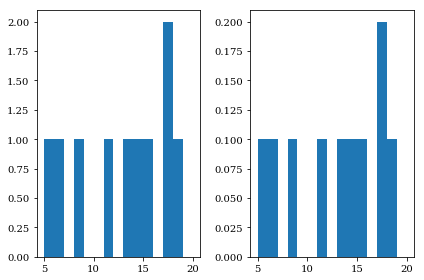

In [2]:
# échantillon de 10

a=5
b=20
x = numpy.random.random_sample(10)
y = (b-a)*x+a

binwidth=1
pyplot.figure()

pyplot.xlim(5,20)
pyplot.subplot(121)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=False);
pyplot.subplot(122)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=True);
pyplot.tight_layout()

C:\Users\guill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


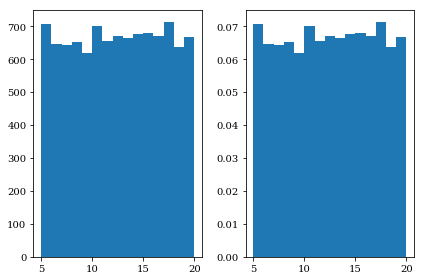

In [3]:
# échantillon de 10.000

a=5
b=20
x = numpy.random.random_sample(10000)
y = (b-a)*x+a

binwidth=1
pyplot.figure()
pyplot.xlim(5,20)
pyplot.subplot(121)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=False);
pyplot.subplot(122)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=True);
pyplot.tight_layout()

Observons que le nombre de tirages pour chaque valeur est déjà nettement plus équilibré.

C:\Users\guill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


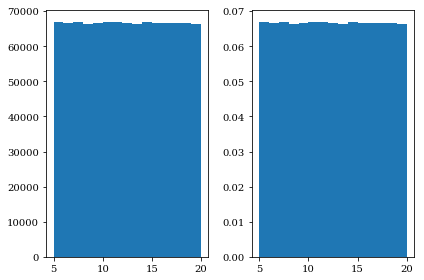

In [4]:
# échantillon de 1.000.000

a=5
b=20
x = numpy.random.random_sample(1000000)
y = (b-a)*x+a

binwidth=1
pyplot.figure()
pyplot.xlim(5,20)
pyplot.subplot(121)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=False);
pyplot.subplot(122)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=True);
pyplot.tight_layout()

A 1.000.000 de tirages, les différences de hauteurs des bins sont presque indicernables, la distribution tend bien vers une distribution uniforme.

### Challenge 1

Dans le notebook, nous avions implémenté les distributions de probabilité gaussienne et exponentielle à l'aide de la méthode de réjection de Von Neuman mais il se fait que python contient déjà des fonctions qui sont supposées faire le même boulot, c'est ce que nous allons vérifier. Signalons tout d'abord que nous effectuerons 10.000 tirages pour chacune de nos fonctions.

1) Reprenons en premier lieu la distribution exponentielle du notebook obtenue par inversion de la distribution. En effet, lorsque la distribution cumulative est connue et inversible, on peut retrouver la distributon de départ à l'aide d'un générateur aléatoire uniforme.

C:\Users\guill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


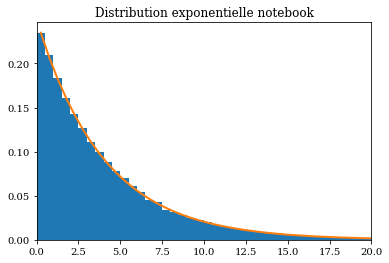

In [5]:
alpha = 0.25 # rate of the exponential distribution
x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)

# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);
pyplot.title("Distribution exponentielle notebook")

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

Python contient la fonction "random.expovariate()" qui prend comme paramètre $\alpha$ et qui renvoie un nombre de 0 à l'infini.
Notons que pour une meilleure comparaison, nous avons pris $\alpha$ = 0,25 dans les deux cas.

C:\Users\guill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


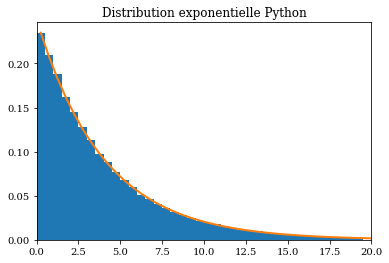

In [6]:
y = [random.expovariate(0.25) for i in range(100000)]

# Plots
binwidth=0.5
pyplot.xlim(0,20)
pyplot.hist(y,bins=numpy.arange(0.,20., binwidth),normed=True);
pyplot.title("Distribution exponentielle Python")

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

En gardant le même fit que pour l'histogramme précedent, on observe que la distribution de python correspond parfaitement au résultat attendu.

2) Faisons maintenant de même pour la distribution gaussienne normale du notebook obtenue par la méthode de réjection de Von Neumann:

C:\Users\guill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


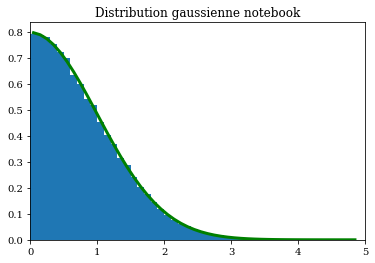

In [7]:
# Number of random numbers to draw according to p1 
N = 100000
K = 1.4

# Empty list for the final set of numbers
h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)

# Plots
binwidth=0.1
pyplot.xlim(0,5)
bins=numpy.arange(0.,5., binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5.1, binwidth),normed=True);
pyplot.title("Distribution gaussienne notebook")

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

Python contient la fonction "random.gauss()" prenant comme paramètre $\mu$ et $\sigma$ et renvoyant un réel. Afin de mieux comparer nos résultats, nous ne prendrons que les résultats positifs.

C:\Users\guill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


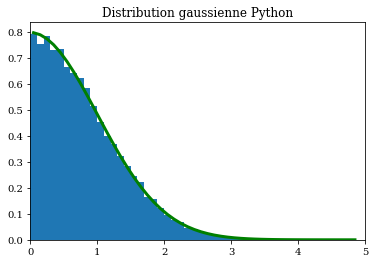

In [8]:
y = [random.gauss(0,1) for i in range(100000)]

#Plots
binwidth=0.1
pyplot.xlim(0,5)
pyplot.hist(y,bins=numpy.arange(0.,5., binwidth),normed=True)
pyplot.title("Distribution gaussienne Python")

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

Encore une fois, en gardant le fit de la fonction précédente, nous pouvons facilement nous convaincre que la distribution correspond bien au résultat attendu.

### Challenge 2

Une autre méthode pour générer des nombres aléatoires selon une distribution gaussienne est la méthode de $Box-Muller$ qui prend deux distributions uniformes indépendantes et qui renvoie deux distributions gaussiennes normales. Cette méthode transforme des coordonnées polaires uniformément distribuées en des coordonnées cartésiennes normalement distribuées.

Implémentons cette méthode:

C:\Users\guill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


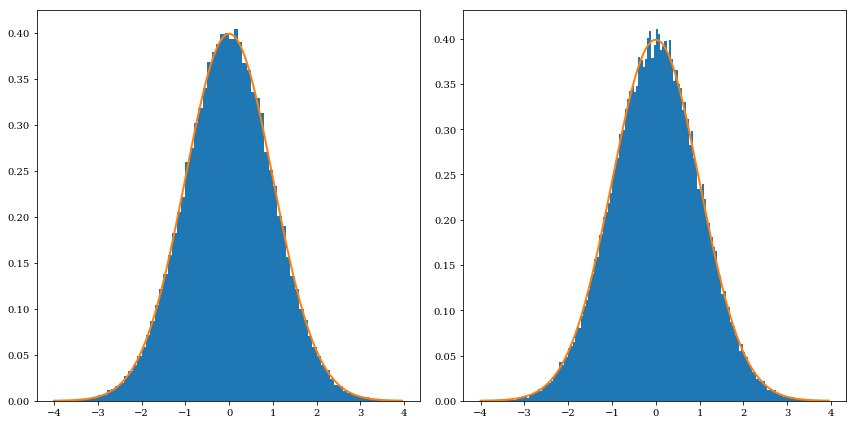

In [9]:
from numpy import pi,cos,sin,log

# Deux distributions uniformes indépendantes de 100.000 tirages chacunes
U1 = numpy.random.random_sample(100000)
U2 = numpy.random.random_sample(100000)

# Obtention des Gaussiennes normales par Box-Muller
Z1 = numpy.sqrt(-2*log(U1))*cos(2*pi*U2)
Z2 = numpy.sqrt(-2*log(U1))*sin(2*pi*U2)

#Plots et fits

pyplot.figure(figsize=(12,6))
pyplot.subplot(121)
pyplot.hist(Z1,bins=numpy.arange(-4.,4., binwidth),normed=True)
binwidth=0.05
x=numpy.arange(-4.,4., binwidth)
pyplot.plot(x,(1/(numpy.sqrt(2*numpy.pi)))*numpy.exp((-1/2)*x**2),lw=2)

pyplot.subplot(122)
pyplot.hist(Z2,bins=numpy.arange(-4.,4., binwidth),normed=True)
pyplot.tight_layout()
binwidth=0.05
x=numpy.arange(-4.,4., binwidth)
pyplot.plot(x,(1/(numpy.sqrt(2*numpy.pi)))*numpy.exp((-1/2)*x**2),lw=2)

Nous obtenons donc bien le résultat attendu qui est deux distributions gaussiennes normales.

## Conclusion:

Après avoir vérifié que la fonction random générait bien des nombres aléatoires suivant une distribution uniforme, nous avons implémenté les distributions exponentielle et gaussienne comme proposées dans le notebook ainsi qu'avec des fonctions préconçues par Python. Nous avons finalement généré une distribution gaussienne normale en partant de deux distributions uniformes à l'aide de la méthode Box-Muller.

# Brownian Motion

## Introduction:

Décrire le mouvement d'une particules d'encre dans de l'eau n'est pas quelque chose de simple, il est d'alleurs impossible de connaître la trajectoire de chaque particules surtout lorsqu'elles intéragissent. Nous allons donc modeliser une version stochastique du mouvement brownien: $ds=\sqrt{2\alpha dt}N(0,1)$ où le mouvement de chaque particule est déterminer de manière aléatoire selon une Gaussienne.

### Challenge 1

Reprenons tout d'abord la computation du mouvement brownien:

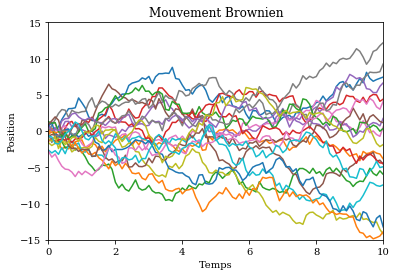

In [10]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

T=50.0
nt=500
dt=T/nt
alpha=2.0

sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)
t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.title("Mouvement Brownien")
    pyplot.xlabel("Temps")
    pyplot.ylabel("Position")
    pyplot.xlim(0,10)
    pyplot.ylim(-15,15)
    pyplot.plot(t,x[:,i])

Le mouvement de chaque particule est déterminé de manière alétoire et indépendante pour chacune d'elle. Nous remarquons donc qu'elles prennent très vite des trajectoires différentes pour une position initiale commune. Si nous ne nous intéressons qu'à une seule trajectoire, nous avons donc en fait modelisé le chemin emprunté par une particule dans un milieu dans lequel elle collisionne fréquemment avec d'autres particules.

Ajoutons maintenant au déplacement une contribution dépendante du temps $cdt$ où $c$ n'est rien d'autre qu'une constante et observons le mouvement pour différentes valeurs de $c$.

In [11]:
# Total simulation time
T=10.0

# Number of time steps and time interval dt
nt=500
dt=T/nt

# Diffusion coefficient
alpha=2.0

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

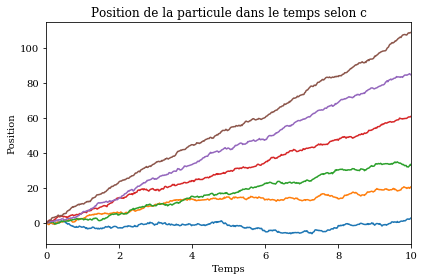

In [12]:
c = 0
while c <= 10:
    for i in range(nt):
        x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    c += 2
    pyplot.title("Position de la particule dans le temps selon c")
    pyplot.xlabel("Temps")
    pyplot.ylabel("Position")
    pyplot.xlim(0,10)
    pyplot.plot(t,x)
    pyplot.tight_layout()

Plus la valeur de $c$ augmente et plus le déplacement de la particule s'éloigne de sa position d'origine. Nous interprétons $c$ comme étant la vitesse initiale et constante de la particule. Il est donc clair que plus la vitesse de la particule est élevée et plus vite elle s'éloignera de sa position initiale. La vitesse, telle qu'implémentée ici, ne dépend pas des collisions avec les autres particules ce qui implique que quelque soit les collisoins subient, la particule garde sa vitesse constante tout en ayant une contribution supplémentaire à son déplacement due aux autres particules (modelisée par une Gaussienne).

### Challenge 2

Ajoutons maintenant comme contribution au déplacement un terme de friction $-\gamma xdt$

In [13]:
# Total simulation time
T=10.0

# Number of time steps and time interval dt
nt=500
dt=T/nt

# Diffusion coefficient
alpha=2.0

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

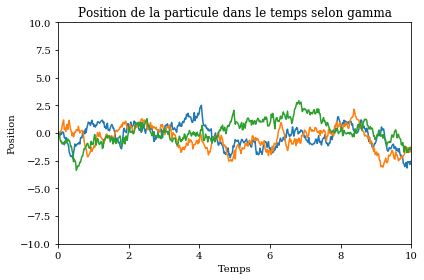

In [14]:
gamma = 0
while gamma <= 2:
    for i in range(nt):
        x[i+1]=x[i]-gamma*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)    
    gamma += 1
    pyplot.title("Position de la particule dans le temps selon gamma")
    pyplot.xlabel("Temps")
    pyplot.ylabel("Position")
    pyplot.xlim(0,10)
    pyplot.ylim(-10,10)
    pyplot.plot(t,x)
    pyplot.tight_layout()

Nous observons que plus le coéfficient de friction est grand et moins la particule parcoura de distance durant un temps donné. Elle ressent de plus en plus les collisions avec ses voisines et va donc rester de plus en plus longtemps à la même position.

Enfin, vérifions le comportement des particules sur des grandes durées avec notre terme de friction:

In [15]:
# Total simulation time
T=10000.0

# Number of time steps and time interval dt
nt=500
dt=T/nt

# Diffusion coefficient
alpha=2.0

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

C:\Users\guill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\guill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


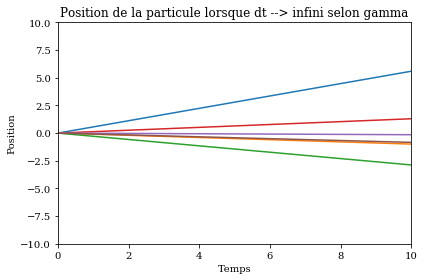

In [16]:
# Time integration (note the use of the numpy.random.normal function)
gamma = 0
while gamma <= 5:
    for i in range(nt):
        x[i+1]=x[i]-gamma*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)    
    gamma += 1
    pyplot.title("Position de la particule lorsque dt --> infini selon gamma")
    pyplot.xlabel("Temps")
    pyplot.ylabel("Position")
    pyplot.xlim(0,10)
    pyplot.ylim(-10,10)
    pyplot.plot(t,x)
    pyplot.tight_layout()

Pour des temps très grands, les particules tendent vers un état stationnaire. Le mouvement brownien semble même imperceptible sur des grandes échelles de temps, ceci nous confirme donc bien que ce caractère est microscopique et donc propre à l'échelle des particules.

## Conclusion:

Après avoir implémenté le mouvement brownien, nous avons analysé le comportement d'une particule lorsque nous rajoutions un terme terme temporel ou un terme de friction dans son équation du mouvement. Nous concluons donc que plus la vitesse de la particule est grande et plus celle-ci s'éloignera de sa position initiale et au plus la particule subira de collisions de la part de ses voisines et moins elle pourra se déplacer. Remarquons également que l'état devient stationnaire pour des grandes échelles de temps.